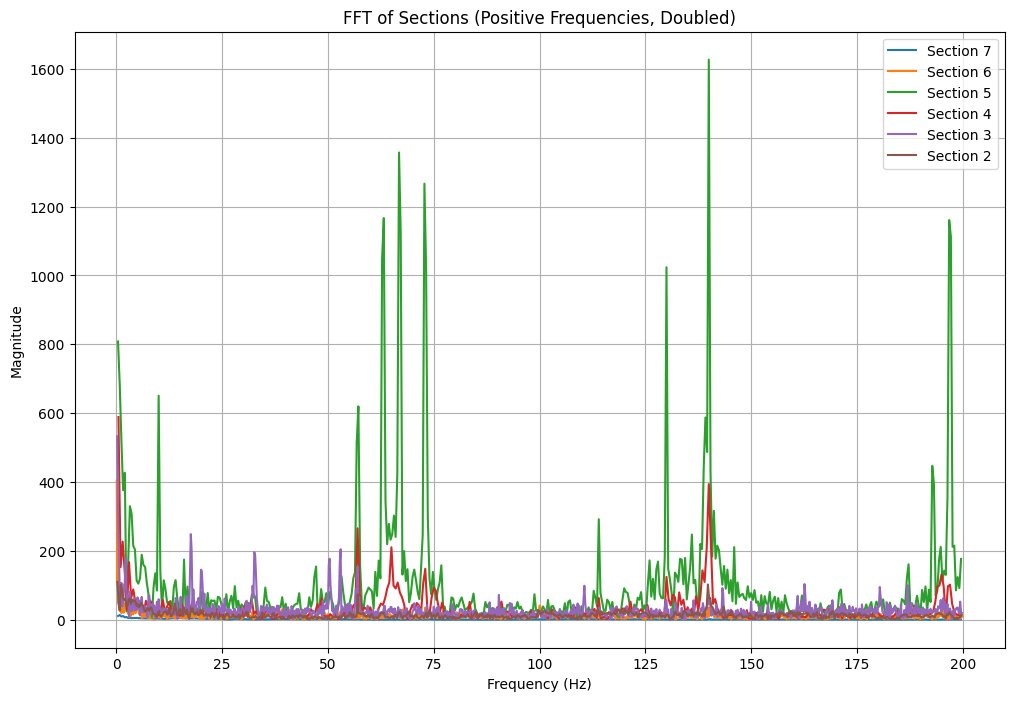

Enter the known frequency (Hz): 65
Frequency 65.0 Hz is most prominent in section 5


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
#file_path = r'C:\Users\vikhy\Downloads\Group7_Case3.csv'  # Using raw string to handle backslashes
file_path = r'C:\Users\deven\Desktop\IMES\Project\Test_v1\Group3_Test5.csv'  # Using raw string to handle backslashes
data = pd.read_csv(file_path)

# Function to perform FFT (considering only positive frequencies and doubling them)
def perform_fft(section_data, sampling_rate):
    section_data = np.asarray(section_data)
    N = len(section_data)
    yf = np.fft.fft(section_data)
    xf = np.fft.fftfreq(N, 1 / sampling_rate)
    
    # Only keep positive frequencies
    positive_freq_mask = xf > 0
    xf_pos = xf[positive_freq_mask]
    yf_pos = np.abs(yf[positive_freq_mask])  # Take absolute value of FFT for magnitude
    
    # Double the positive frequencies
    xf_pos *= 2
    
    return xf_pos, yf_pos

# Segment the data by section
sections = data['Section'].unique()
sampling_rate = 1 / (data['Time (s)'].diff().mean())

# Dictionary to store FFT results for each section
fft_results = {}

for section in sections:
    section_data = data[data['Section'] == section]['Absolute acceleration (m/s^2)']
    try:
        xf, yf = perform_fft(section_data, sampling_rate)
        fft_results[section] = (xf, yf)
    except Exception as e:
        print(f"Error processing section {section}: {e}")

# Plot the FFT results for each section (only positive frequencies, with doubled frequencies)
plt.figure(figsize=(12, 8))
for section, (xf, yf) in fft_results.items():
    plt.plot(xf, yf, label=f'Section {section}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Sections (Positive Frequencies, Doubled)')
plt.legend()
plt.grid(True)
plt.show()

# Prompt user to enter the known frequency and range
known_frequency = float(input("Enter the known frequency (Hz): "))
frequency_range = 5  # Adjust this value to set the range around the known frequency
tolerance = 0.1
min_magnitude = 0.1

# Find which section contains the known frequency within the specified range
found_section = None
max_magnitude = -1
for section, (xf, yf) in fft_results.items():
    # Find indices within the specified frequency range
    indices = np.where(np.logical_and(xf >= known_frequency - frequency_range, xf <= known_frequency + frequency_range))[0]
    if len(indices) > 0:
        # Find maximum magnitude within the indices
        max_index = np.argmax(yf[indices])
        if yf[indices[max_index]] > min_magnitude:
            if yf[indices[max_index]] > max_magnitude:
                max_magnitude = yf[indices[max_index]]
                found_section = section

if found_section is not None:
    print(f"Frequency {known_frequency} Hz is most prominent in section {found_section}")
else:
    print(f"Frequency {known_frequency} Hz is not found in any section.")


In [27]:
import pandas as pd
import glob
import re

file_paths = glob.glob(r'C:\Users\deven\Desktop\IMES\Project\Test_v1\Group*_Test*.csv')
dataframes = []

for file in file_paths:
    # Extract group and case numbers using regex
    match = re.search(r'Group(\d+)_Test(\d+)', file)
    if match:
        group_number = int(match.group(1))
        case_number = int(match.group(2))

        # Load the CSV file
        df = pd.read_csv(file)
        
        # Add group and case number columns
        df['Group number'] = group_number
        df['Case number'] = case_number

        dataframes.append(df)

In [28]:
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.head(10)

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),Section,Group number,Case number
0,0.015963,0.000000,0.000000,0.000000,0.000000,7,3,1
1,0.020963,0.031130,0.001607,-0.030894,0.043888,7,3,1
2,0.025963,0.096517,-0.033171,-0.073751,0.125917,7,3,1
3,0.030963,0.082344,-0.047164,-0.122654,0.155077,7,3,1
4,0.035963,-0.045822,-0.051453,-0.146916,0.162270,7,3,1
5,0.040963,-0.093129,0.011711,-0.075245,0.120300,7,3,1
6,0.045963,-0.126588,0.103508,0.078166,0.181242,7,3,1
7,0.050963,-0.182798,0.147681,0.124159,0.265782,7,3,1
8,0.055963,-0.044975,0.116013,0.101856,0.160799,7,3,1
9,0.060963,0.084053,0.062711,0.018260,0.106447,7,3,1


In [29]:
# file_path_t1 = r'C:\Users\deven\Desktop\IMES\Project\Test_v1\Group3_Test1.csv'
# file_path_t2 = r'C:\Users\deven\Desktop\IMES\Project\Test_v1\Group3_Test2.csv'
# file_path_t3 = r'C:\Users\deven\Desktop\IMES\Project\Test_v1\Group3_Test3.csv'
# file_path_t4 = r'C:\Users\deven\Desktop\IMES\Project\Test_v1\Group3_Test4.csv'
# file_path_t5 = r'C:\Users\deven\Desktop\IMES\Project\Test_v1\Group3_Test5.csv'# Using raw string to handle backslashes

In [30]:
metadata = {
    'Group number': [3, 3, 3, 3, 3],
    'Case number': [1, 2, 3, 4, 5],
    'Frequency': [65, 0, 65, 0, 65],
    'Frequency Location': ['5', '0', '5', '0', '5']
}

metadata_df = pd.DataFrame(metadata)

# Convert metadata to a dictionary of dictionaries for faster lookup
metadata_dict = {(row['Group number'], row['Case number']): row for _, row in metadata_df.iterrows()}

In [36]:
def get_section_value(row, location_key):
    group_case_key = (row['Group number'], row['Case number'])
    if group_case_key in metadata_dict:
        location_value = metadata_dict[group_case_key][location_key]
        if location_value in ['3&4', '5&6', '3&5', '3&6', '4&5', '4&6','3','4','5','6','0']:
            section_pairs = location_value.split('&')
            return 1 if row['Section'] in list(map(int, section_pairs)) else 0
        elif location_value == '3':
            return 1 if row['Section'] == 3 else 0
        elif location_value == '4':
            return 1 if row['Section'] == 4 else 0
        elif location_value == '5':
            return 1 if row['Section'] == 5 else 0
        elif location_value == '6':
            return 1 if row['Section'] == 6 else 0
        else:
            return 0
    return 0

In [37]:
combined_df['Frequency_Location'] = combined_df.apply(lambda row: get_section_value(row, 'Frequency Location'), axis=1)
# Adding Frequency
combined_df['Frequency'] = combined_df.apply(lambda row: metadata_dict[(row['Group number'], row['Case number'])]['Frequency'], axis=1)


In [38]:
combined_df.head(10)

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),Section,Group number,Case number,Frequency_Location,Frequency
0,0.015963,0.000000,0.000000,0.000000,0.000000,7,3,1,0,65
1,0.020963,0.031130,0.001607,-0.030894,0.043888,7,3,1,0,65
2,0.025963,0.096517,-0.033171,-0.073751,0.125917,7,3,1,0,65
3,0.030963,0.082344,-0.047164,-0.122654,0.155077,7,3,1,0,65
4,0.035963,-0.045822,-0.051453,-0.146916,0.162270,7,3,1,0,65
5,0.040963,-0.093129,0.011711,-0.075245,0.120300,7,3,1,0,65
6,0.045963,-0.126588,0.103508,0.078166,0.181242,7,3,1,0,65
7,0.050963,-0.182798,0.147681,0.124159,0.265782,7,3,1,0,65
8,0.055963,-0.044975,0.116013,0.101856,0.160799,7,3,1,0,65
9,0.060963,0.084053,0.062711,0.018260,0.106447,7,3,1,0,65


In [39]:
combined_df.to_csv(r'C:\Users\deven\Desktop\IMES\Project\Test_v1\Test_v1.csv', index = False)

## Model Test 1

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPooling1D, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

loaded_model = tf.keras.models.load_model(r'C:\Users\deven\Desktop\KANs\kan\experiment\my_model_v1.h5')

In [43]:
data = pd.read_csv(r'C:\Users\deven\Desktop\IMES\Project\Test_v1\Test_v1.csv')
data.shape

(49983, 10)

In [44]:
data.head(10)

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),Section,Group number,Case number,Frequency_Location,Frequency
0,0.015963,0.000000,0.000000,0.000000,0.000000,7,3,1,0,0
1,0.020963,0.031130,0.001607,-0.030894,0.043888,7,3,1,0,0
2,0.025963,0.096517,-0.033171,-0.073751,0.125917,7,3,1,0,0
3,0.030963,0.082344,-0.047164,-0.122654,0.155077,7,3,1,0,0
4,0.035963,-0.045822,-0.051453,-0.146916,0.162270,7,3,1,0,0
5,0.040963,-0.093129,0.011711,-0.075245,0.120300,7,3,1,0,0
6,0.045963,-0.126588,0.103508,0.078166,0.181242,7,3,1,0,0
7,0.050963,-0.182798,0.147681,0.124159,0.265782,7,3,1,0,0
8,0.055963,-0.044975,0.116013,0.101856,0.160799,7,3,1,0,0
9,0.060963,0.084053,0.062711,0.018260,0.106447,7,3,1,0,0


In [46]:
data = data.drop(['Group number', 'Case number', 'Absolute acceleration (m/s^2)'], axis =1)
data.shape

(49983, 7)

In [47]:
data.head(10)

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Section,Frequency_Location,Frequency
0,0.015963,0.000000,0.000000,0.000000,7,0,0
1,0.020963,0.031130,0.001607,-0.030894,7,0,0
2,0.025963,0.096517,-0.033171,-0.073751,7,0,0
3,0.030963,0.082344,-0.047164,-0.122654,7,0,0
4,0.035963,-0.045822,-0.051453,-0.146916,7,0,0
5,0.040963,-0.093129,0.011711,-0.075245,7,0,0
6,0.045963,-0.126588,0.103508,0.078166,7,0,0
7,0.050963,-0.182798,0.147681,0.124159,7,0,0
8,0.055963,-0.044975,0.116013,0.101856,7,0,0
9,0.060963,0.084053,0.062711,0.018260,7,0,0


In [48]:
data = data[~data.Section.isin([7,1])]
data.head(10)

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Section,Frequency_Location,Frequency
997,5.000963,0.109349,-0.075885,-0.628361,6,0,0
998,5.005963,0.149456,-0.138628,0.060367,6,0,0
999,5.010963,0.204115,-0.146595,0.754266,6,0,0
1000,5.015963,0.222768,-0.015894,0.745204,6,0,0
1001,5.020963,0.128299,-0.006589,0.141309,6,0,0
1002,5.025963,0.072749,-0.044693,-0.264656,6,0,0
1003,5.030963,-0.034207,0.058454,-0.323079,6,0,0
1004,5.035963,-0.086050,0.227431,-0.308578,6,0,0
1005,5.040963,-0.094588,0.243566,-0.169029,6,0,0
1006,5.045963,-0.115193,0.129675,0.133716,6,0,0


In [49]:
y_pred = loaded_model.predict(data)

1407/1407 [==============================] - 6s 4ms/step


In [51]:
#y_pred_frequency = y_pred[0]  # Frequency prediction
#y_pred_frequency_loc = y_pred[1]  # Frequency location prediction (one-hot encoded)
y_pred_damping_loc = y_pred[0]  # Damping location prediction (one-hot encoded)
y_pred_inclination_loc = y_pred[1]  # Inclination location prediction (one-hot encoded)

# Decoding outputs
#y_pred_frequency_loc_decoded = np.argmax(y_pred_frequency_loc, axis=1)
y_pred_damping_loc_decoded = np.argmax(y_pred_damping_loc, axis=1)
y_pred_inclination_loc_decoded = np.argmax(y_pred_inclination_loc, axis=1)

In [53]:
# DataFrame to see the results
predictions_df = pd.DataFrame({
    #'Predicted_Frequency': y_pred_frequency.flatten(),
    #'Predicted_Frequency_Location': y_pred_frequency_loc_decoded,
    'Predicted_Damping_Location': y_pred_damping_loc_decoded,
    'Predicted_Inclination_Location': y_pred_inclination_loc_decoded
})

# predictions
print(predictions_df)

       Predicted_Damping_Location  Predicted_Inclination_Location
0                               0                               0
1                               0                               0
2                               0                               0
3                               0                               0
4                               0                               0
...                           ...                             ...
44994                           1                               0
44995                           1                               0
44996                           1                               0
44997                           1                               0
44998                           1                               0

[44999 rows x 2 columns]


In [56]:
b = predictions_df[predictions_df['Predicted_Inclination_Location']==1]
b

,Predicted_Damping_Location,Predicted_Inclination_Location


In [55]:
a = predictions_df[predictions_df['Predicted_Damping_Location']==1]
a

,Predicted_Damping_Location,Predicted_Inclination_Location
7417,1,0
7420,1,0
7429,1,0
7432,1,0
7433,1,0
...,...,...
44994,1,0
44995,1,0
44996,1,0
44997,1,0
